In [18]:
import numpy as np
import numpy.polynomial.polynomial as npoly
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(2017)
import pandas as pd


df=pd.read_csv("cost_inn_obj.csv",names=["t", "inn1", "inn2", "inn3", "inn4", "inn5"],header=0)

In [19]:
df

,t,inn1,inn2,inn3,inn4,inn5
0,0.00,1.993040,2.987696,4.038422,1.978295,3.997615
1,1.25,1.747971,3.047902,3.830950,1.952764,3.998935
2,2.50,1.563452,3.093349,3.641949,1.929984,3.997856
3,3.75,1.430707,3.132355,3.473735,1.915243,3.996234
4,5.00,1.331523,3.167322,3.324632,1.910463,3.995217
5,6.25,1.255083,3.199572,3.192333,1.915827,3.995566
6,7.50,1.194761,3.230098,3.074801,1.930712,3.997833
7,8.75,1.146394,3.259707,2.970423,1.954193,4.002448
8,10.00,1.107306,3.289068,2.877956,1.985308,4.009773
9,11.25,1.075737,3.318737,2.796441,2.023185,4.020120


In [20]:
inn_reg=pd.DataFrame(columns=["Inn","C0R1","C1R1","C0R2","C1R2","C0R3","C1R3","C0R4","C1R4","C0R5","C1R5"])
inn_xrang=pd.DataFrame(columns=["R0","R1","R2","R3","R4","R5"])
inn_yrang=pd.DataFrame(columns=["Y0","Y1","Y2","Y3","Y4","Y5"])

y = 1.982948468231794 - 0.17183527525381753·x¹, if x in [0.0, 2.5]
y = 1.5951508108889159 - 0.05103350617111414·x¹, if x in [3.75, 10.0]
y = 1.1126180387712448 - 0.005573597876687499·x¹, if x in [11.25, 22.5]
y = 0.4930702533994827 + 0.021375681129971343·x¹, if x in [23.75, 36.25]
y = -0.40749843056904 + 0.045749518306447336·x¹, if x in [37.5, 50.0]


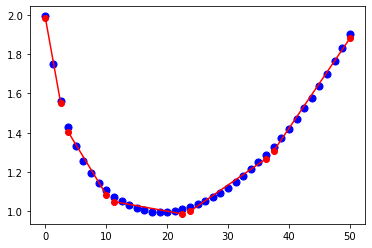

In [21]:
#inn1
inn=1
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn1)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)

plt.scatter(x, y, c='blue', s=50)
count=1
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()



y = 3.018618905131355 + 0.026941868894903218·x¹, if x in [0.0, 20.0]
y = 2.660179431582209 + 0.0443788123040866·x¹, if x in [21.25, 28.75]
y = 2.068625251605499 + 0.0645595045104087·x¹, if x in [30.0, 36.25]
y = 1.1837515288121807 + 0.08848151367803447·x¹, if x in [37.5, 43.75]
y = -0.02474675406873093 + 0.11578420280809593·x¹, if x in [45.0, 50.0]


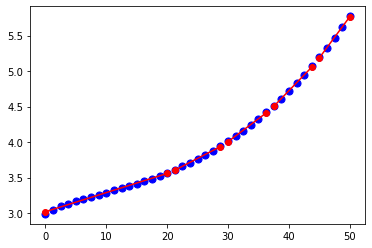

In [22]:
inn=2
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn2)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()



y = 4.006357159524767 - 0.1352597750790733·x¹, if x in [0.0, 6.25]
y = 3.4720418056638813 - 0.057794485918491297·x¹, if x in [7.5, 16.25]
y = 2.5243708177075788 - 0.0015270827628730045·x¹, if x in [17.5, 27.5]
y = 1.2093104273053183 + 0.04540469673182934·x¹, if x in [28.75, 38.75]
y = -0.5852530381690004 + 0.0909144993584903·x¹, if x in [40.0, 50.0]


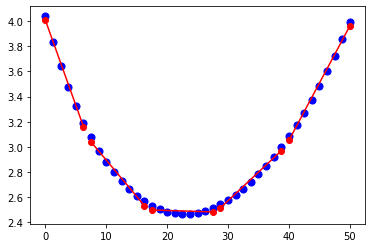

In [23]:
inn=3
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn3)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()




y = 1.9586279320139413 - 0.006746924845104989·x¹, if x in [0.0, 7.5]
y = 1.5708041358331026 + 0.04092292570518301·x¹, if x in [8.75, 18.75]
y = 0.8999301636132555 + 0.07530941609151622·x¹, if x in [20.0, 31.25]
y = -0.31974089426933355 + 0.11379702399933246·x¹, if x in [32.5, 41.25]
y = -2.1410093217275468 + 0.15731979360768533·x¹, if x in [42.5, 50.0]


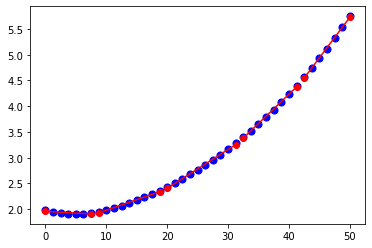

In [24]:
inn=4
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn4)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn

plt.show()



y = 3.9859500983029994 + 0.003211624867309017·x¹, if x in [0.0, 13.75]
y = 3.5912952449350417 + 0.03096349120244064·x¹, if x in [15.0, 23.75]
y = 2.725662429554737 + 0.0662105685758708·x¹, if x in [25.0, 33.75]
y = 1.265621502137369 + 0.1087565098966041·x¹, if x in [35.0, 42.5]
y = -0.7317573325388764 + 0.15516915018192967·x¹, if x in [43.75, 50.0]


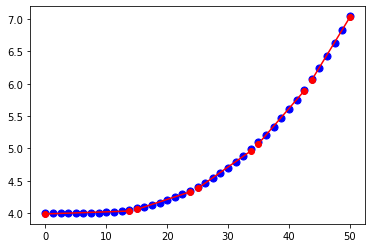

In [25]:
inn=5
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn5)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()



https://stackoverflow.com/questions/46218934/piecewise-linear-fit-with-n-breakpoints

In [26]:
inn_reg

,Inn,C0R1,C1R1,C0R2,C1R2,C0R3,C1R3,C0R4,C1R4,C0R5,C1R5
1,1,1.983,-0.172,1.595,-0.051,1.113,-0.006,0.493,0.021,-0.407,0.046
2,2,3.019,0.027,2.66,0.044,2.069,0.065,1.184,0.088,-0.025,0.116
3,3,4.006,-0.135,3.472,-0.058,2.524,-0.002,1.209,0.045,-0.585,0.091
4,4,1.959,-0.007,1.571,0.041,0.9,0.075,-0.32,0.114,-2.141,0.157
5,5,3.986,0.003,3.591,0.031,2.726,0.066,1.266,0.109,-0.732,0.155


In [27]:
inn_xrang

,R0,R1,R2,R3,R4,R5
1,0.0,2.5,10.0,22.5,36.25,50.0
2,0.0,20.0,28.75,36.25,43.75,50.0
3,0.0,6.25,16.25,27.5,38.75,50.0
4,0.0,7.5,18.75,31.25,41.25,50.0
5,0.0,13.75,23.75,33.75,42.5,50.0


In [28]:
inn_yrang

,Y0,Y1,Y2,Y3,Y4,Y5
1,0.0,1.55336,1.084816,0.987212,1.267939,1.879977
2,0.0,3.557456,3.93607,4.408907,5.054818,5.764463
3,0.0,3.160984,2.532881,2.482376,2.968742,3.960472
4,0.0,1.908026,2.338109,3.253349,4.374386,5.72498
5,0.0,4.03011,4.326678,4.960269,5.887773,7.0267


In [29]:
inn_reg.to_csv("./inn_reg.csv")
inn_xrang.to_csv("./inn_xrang.csv")
inn_yrang.to_csv("./inn_yrang.csv")